<a href="https://colab.research.google.com/github/saravanan421/machine-learning/blob/main/website_traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv(r'D:\naan mudhalvan\daily-website-visitors\daily-website-visitors.csv')
label=LabelEncoder()
data['Day']=label.fit_transform(data['Day'])
data.tail()


,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
2162,2163,2,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,3,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,1,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,5,3,8/18/2020,"3,581","2,683","2,184",499
2166,2167,6,4,8/19/2020,"2,064","1,564","1,297",267


In [ ]:
data.isna().count()

Row                2167
Day                2167
DayOfWeek          2167
Date               2167
PageLoads          2167
UniqueVisits       2167
FirstTimeVisits    2167
ReturningVisits    2167
dtype: int64

In [ ]:
data.dtypes

Row                 int64
Day                 int32
DayOfWeek           int64
Date               object
PageLoads          object
UniqueVisits       object
FirstTimeVisits    object
ReturningVisits    object
month               int32
year                int32
dtype: object

In [ ]:
data.describe()

,Row,Day,DayOfWeek,month,year
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.00000
mean,1084.000000,3.001384,3.997231,6.498846,2017.16982
std,625.703338,2.000577,2.000229,3.462485,1.75318
min,1.000000,0.000000,1.000000,1.000000,2014.00000
25%,542.500000,1.000000,2.000000,3.500000,2016.00000
50%,1084.000000,3.000000,4.000000,6.000000,2017.00000
75%,1625.500000,5.000000,6.000000,10.000000,2019.00000
max,2167.000000,6.000000,7.000000,12.000000,2020.00000


In [ ]:
#finding the months
datas=data.copy(deep=True)
datass=data.copy(deep=True)
months=datas['Date']
year=datas['Date']
for i in range(len(months)):
    if '-' in months[i]:
        value=months[i].split('-')
    if '/' in months[i]:
        value=months[i].split('/')


    months[i]=int(value[0])

print(months)



C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local

17      10
18      10
19      10
20      10
21      10
        ..
2162     8
2163     8
2164     8
2165     8
2166     8
Name: Date, Length: 2167, dtype: object


C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\966105305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months[i]=int(value[0])
C:\Users\Ksiva\AppData\Local

In [ ]:
year=datass['Date']
for i in range(len(year)):
    if '-' in year[i]:
        s=year[i].split('-')
    if '/' in year[i]:
        s=year[i].split('/')

    year[i]=int(s[2])

C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\1780046205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]=int(s[2])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\1780046205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]=int(s[2])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18100\1780046205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]=int(s[2])
C:\Users\Ksiva\AppData\Local\Temp\ipykernel_18

In [ ]:
months=months.astype(int)
year=year.astype(int)
data[['PageLoads','UniqueVisits','FirstTimeVisits']]=x=data[['PageLoads','UniqueVisits','FirstTimeVisits']].replace(',', '', regex=True).astype(int)

data['month']=months
data['year']=year
data.head()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,month,year
0,1,3,1,9/14/2014,2146,1582,1430,152,9,2014
1,2,1,2,9/15/2014,3621,2528,2297,231,9,2014
2,3,5,3,9/16/2014,3698,2630,2352,278,9,2014
3,4,6,4,9/17/2014,3667,2614,2327,287,9,2014
4,5,4,5,9/18/2014,3316,2366,2130,236,9,2014


In [ ]:
data=data.sort_values(by=['year','month'],ascending=True)
data.tail()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,month,year
2162,2163,2,7,8/15/2020,2221,1696,1373,323,8,2020
2163,2164,3,1,8/16/2020,2724,2037,1686,351,8,2020
2164,2165,1,2,8/17/2020,3456,2638,2181,457,8,2020
2165,2166,5,3,8/18/2020,3581,2683,2184,499,8,2020
2166,2167,6,4,8/19/2020,2064,1564,1297,267,8,2020


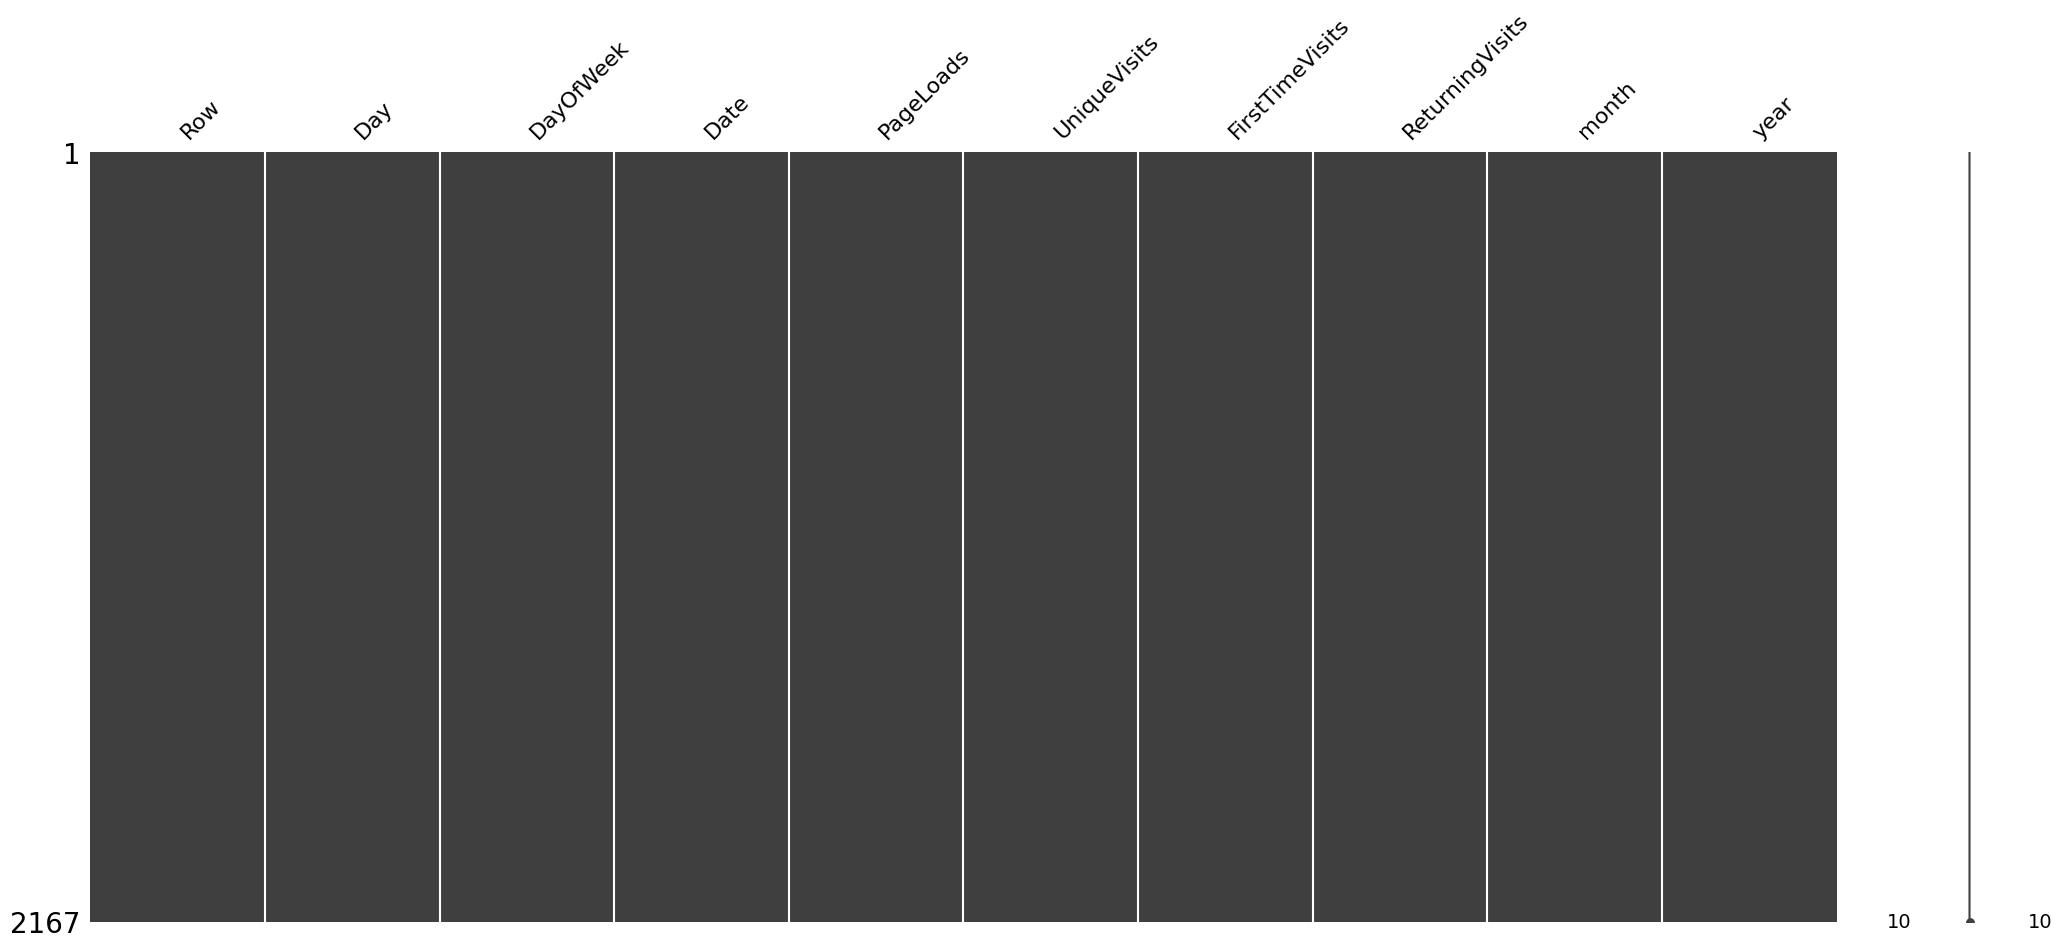

In [ ]:
missingno.matrix(data)
plt.show()

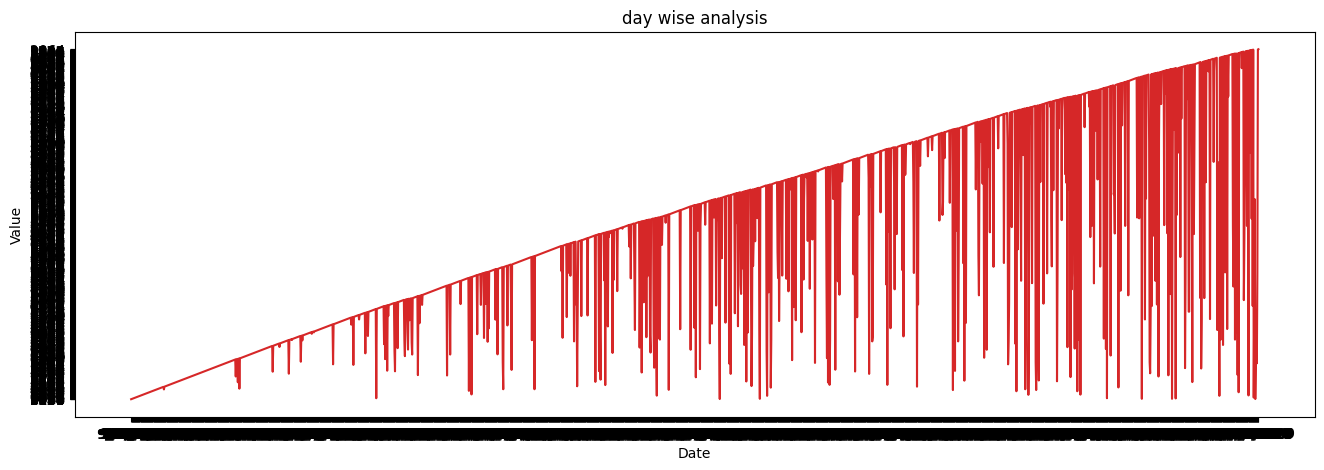

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(data,x=data.Date,y=data.PageLoads,title='day wise analysis')


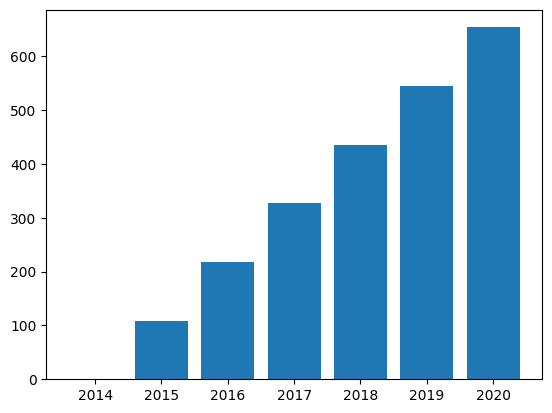

In [ ]:
q=data.groupby(by=['year'])['ReturningVisits']
year_wise=pd.DataFrame(q)
g=[]
for i in range(len(data.year.unique())):
    v=0
    for j in year_wise[1][0]:
        v+=i
    g.append(v)
plt.bar(data.year.unique(),g)
plt.show()

C:\Users\Ksiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


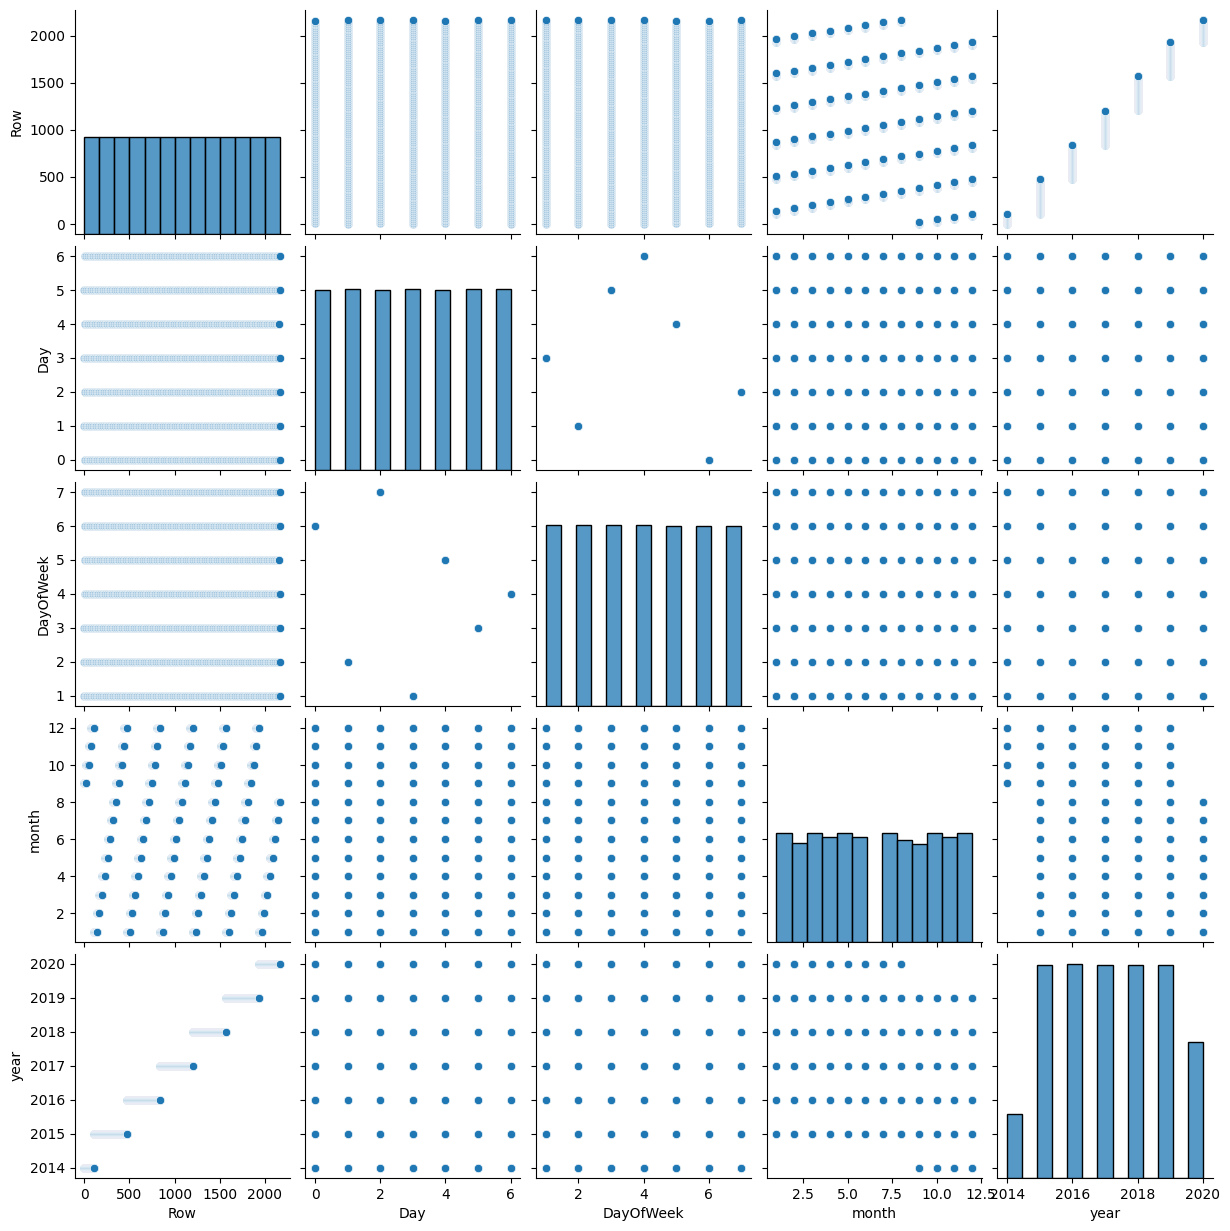

In [ ]:
sns.pairplot(data)

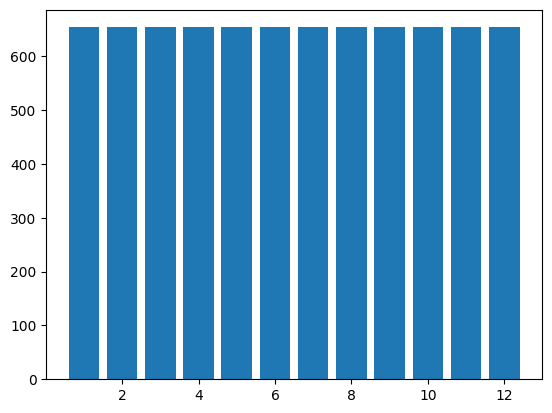

In [ ]:
d=data.groupby(by=['month'])['ReturningVisits']
month_wise=pd.DataFrame(q)
e=[]
for i in range(len(data.month.unique())):
    u=0
    for j in month_wise[1][0]:
        u+=i
    e.append(v)
plt.bar(data.month.unique(),e)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
x=data[['PageLoads','UniqueVisits','FirstTimeVisits']].replace(',', '', regex=True)
y=data['ReturningVisits'].replace(',', '', regex=True)
x1,x2,y1,y2=train_test_split(x,y,test_size=0.3,random_state=3)
model=LinearRegression()
model.fit(x1,y1)
pre=model.predict(x2)
acc=mean_absolute_error(pre,y2)
print("accuracy metrics : ",acc)

accuracy metrics :  1.224796676437103e-12
